# Лабораторна робота №5
## Студента групи МІТ-31 (підгрупа 2)
## Фітя Владислава Тарасовича

# Завдання
1.  Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 2,3 з використанням Tensorflow & NN
2.  Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab5.

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib as mplt
import sklearn.model_selection
import sklearn.datasets
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import random

In [6]:
model_1 = pd.read_csv("./data.csv")

In [7]:
model_1.head()

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1


In [8]:
model_1.isna().sum()

Unnamed: 0    0
salary        0
age           0
degree        0
gender        0
credits       0
is_gamer      0
dtype: int64

In [10]:
insurance=pd.get_dummies(model_1)
insurance.head(19)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1
5,5,2109,0,0,1,1,1
6,6,752,1,1,1,0,0
7,7,4269,1,1,0,0,0
8,8,294,1,0,1,1,0
9,9,2727,0,1,1,1,0


In [11]:
X=insurance.drop("salary",axis=1)
y=insurance["salary"]

X.head(), y.head()

(   Unnamed: 0  age  degree  gender  credits  is_gamer
 0           0    0       0       1        1         0
 1           1    1       0       0        0         0
 2           2    0       1       0        1         1
 3           3    1       1       0        0         1
 4           4    1       0       0        1         1,
 0    3996
 1    1016
 2     420
 3    2893
 4    4010
 Name: salary, dtype: int64)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


tf.random.set_seed=13

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

X_train.shape

(266, 6)

In [17]:
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 1ms/step - loss: 9835611.0000 - mse: 9835611.0000
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 9771473.0000 - mse: 9771473.0000
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 9704900.0000 - mse: 9704900.0000
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 9643083.0000 - mse: 9643083.0000
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 9578381.0000 - mse: 9578381.0000
Epoch 6/10
9/9 [==============================] - 0s 1ms/step - loss: 9515759.0000 - mse: 9515759.0000
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 9450380.0000 - mse: 9450380.0000
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 9386606.0000 - mse: 9386606.0000
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 9322928.0000 - mse: 9322928.0000
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 92

In [18]:
history2 = model.fit(X_train,y_train,epochs=200, verbose=0)

score1=model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 3509208.0000 - mse: 3509208.0000


In [19]:
model.save("model.h5")

loaded_model=tf.keras.models.load_model("model.h5")


y1=model.predict(X_test)
y2=loaded_model.predict(X_test)

(y1-y2).sum()

X_train.head()

,Unnamed: 0,age,degree,gender,credits,is_gamer
58,58,1,1,1,0,1
259,259,0,1,1,0,1
95,95,0,0,0,0,0
131,131,1,0,1,1,0
286,286,1,1,1,1,0


In [22]:
insurance2 = model_1
insurance2.head(19)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1
5,5,2109,0,0,1,1,1
6,6,752,1,1,1,0,0
7,7,4269,1,1,0,0,0
8,8,294,1,0,1,1,0
9,9,2727,0,1,1,1,0


In [23]:
ct = make_column_transformer(
    (MinMaxScaler(),["age", "degree","gender"]), 
    (OneHotEncoder(handle_unknown="ignore"),['credits','is_gamer'])
)
X=insurance2.drop("salary", axis=1)
y = insurance2["salary"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [24]:
im3.compile(
    loss=mae, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["mae"]
)
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

3/3 [==============================] - 0s 997us/step - loss: 2177.6611 - mae: 2177.6611


(266, 6)

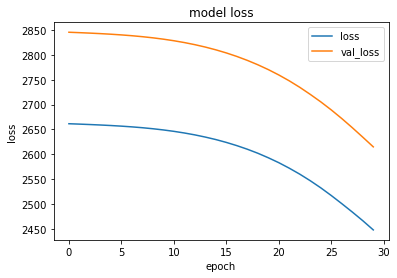

In [28]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [27]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [29]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [30]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [31]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [32]:
train_labels[7]

2

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [34]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3432 - accuracy: 0.0997 - val_loss: 2.2890 - val_accuracy: 0.1072
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2226 - accuracy: 0.1384 - val_loss: 2.1718 - val_accuracy: 0.1670
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0322 - accuracy: 0.1985 - val_loss: 1.9084 - val_accuracy: 0.2407
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7397 - accuracy: 0.2943 - val_loss: 1.6329 - val_accuracy: 0.3134
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5723 - accuracy: 0.3368 - val_loss: 1.5264 - val_accuracy: 0.3561
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5152 - accuracy: 0.3456 - val_loss: 1.4985 - val_accuracy: 0.3543
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4775 - accuracy: 0.3502 - val_loss: 1.4678 - val_accuracy:

In [35]:
train_data.min(), train_data.max()
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [36]:
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0091 - accuracy: 0.6197 - val_loss: 0.7339 - val_accuracy: 0.7360
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6773 - accuracy: 0.7614 - val_loss: 0.6634 - val_accuracy: 0.7628
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6320 - accuracy: 0.7779 - val_loss: 0.6292 - val_accuracy: 0.7752
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6070 - accuracy: 0.7869 - val_loss: 0.6147 - val_accuracy: 0.7855
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5868 - accuracy: 0.7934 - val_loss: 0.5966 - val_accuracy: 0.7850
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5674 - accuracy: 0.8009 - val_loss: 0.5808 - val_accuracy: 0.7946
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5477 - accuracy: 0.8098 - val_loss: 0.5663 - val_accuracy:

<AxesSubplot:title={'center':'Normalized data'}>

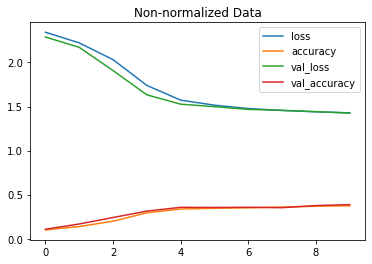

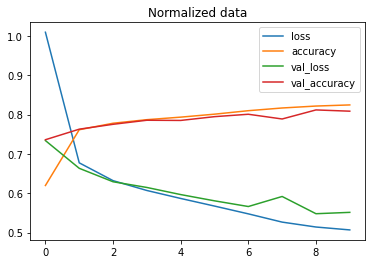

In [37]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [38]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6846 - accuracy: 0.3318 - val_loss: 1.3297 - val_accuracy: 0.4673
Epoch 2/40
1875/1875 [==============================] - 2s 991us/step - loss: 1.1517 - accuracy: 0.5372 - val_loss: 1.0641 - val_accuracy: 0.5657
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0121 - accuracy: 0.5735 - val_loss: 0.9954 - val_accuracy: 0.5838
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9350 - accuracy: 0.6390 - val_loss: 0.8786 - val_accuracy: 0.6742
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8165 - accuracy: 0.6847 - val_loss: 0.8224 - val_accuracy: 0.6781
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7733 - accuracy: 0.6909 - val_loss: 0.7722 - val_accuracy: 0.6896
Epoch 7/40
1875/1875 [==============================] - 2s 971us/step - loss: 0.7457 - accuracy: 0.6985 - val_loss: 0.7523 - val_accur

Text(0.5, 1.0, 'Finding the ideal learning rate')

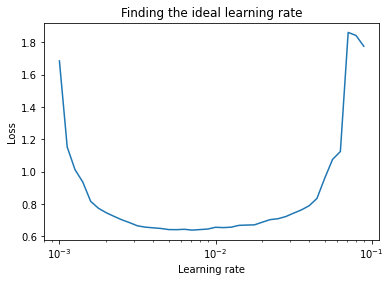

In [39]:

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [40]:
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5064 - accuracy: 0.3843 - val_loss: 1.0864 - val_accuracy: 0.6175
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9360 - accuracy: 0.6616 - val_loss: 0.8836 - val_accuracy: 0.6843
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8170 - accuracy: 0.6991 - val_loss: 0.8254 - val_accuracy: 0.6924
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7698 - accuracy: 0.7193 - val_loss: 0.7781 - val_accuracy: 0.7133
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7371 - accuracy: 0.7322 - val_loss: 0.7540 - val_accuracy: 0.7294
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7159 - accuracy: 0.7427 - val_loss: 0.7350 - val_accuracy: 0.7391
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6984 - accuracy: 0.7489 - val_loss: 0.7276 - val_accuracy:

In [41]:
y_probs = model_14.predict(test_data)

y_probs[:5]

array([[3.1528757e-09, 6.4654684e-13, 6.2332678e-12, 3.3137158e-07,
        4.0571501e-11, 2.6471999e-01, 9.1176472e-10, 1.6901428e-01,
        1.6338081e-04, 5.6610209e-01],
       [2.2343626e-02, 1.9993109e-05, 5.5610037e-01, 5.2020405e-03,
        6.1191432e-02, 1.4508826e-04, 3.4974244e-01, 1.4753665e-09,
        5.2549569e-03, 4.1441894e-09],
       [1.0156200e-04, 9.9919754e-01, 8.6285692e-12, 7.0068357e-04,
        1.1373736e-07, 1.1119719e-22, 1.4598973e-07, 0.0000000e+00,
        1.8539330e-12, 0.0000000e+00],
       [4.5121906e-05, 9.9879420e-01, 9.2117017e-12, 1.1600903e-03,
        4.2359653e-07, 2.5226316e-24, 1.7945908e-07, 0.0000000e+00,
        2.9563693e-12, 0.0000000e+00],
       [1.9584380e-01, 1.1308845e-03, 2.0337158e-01, 3.7757620e-02,
        6.1404467e-02, 3.5013909e-05, 4.9802408e-01, 1.3181072e-10,
        2.4324148e-03, 1.9885925e-13]], dtype=float32)

In [42]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [43]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 2, 5, 7], dtype=int64)

In [46]:
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[813,  18,  30,  66,   8,   5,  52,   1,   7,   0],
       [  9, 932,   6,  43,   3,   1,   5,   0,   1,   0],
       [ 25,   1, 610,  11, 241,   1,  99,   0,  12,   0],
       [ 67,  35,  11, 792,  35,   3,  47,   0,  10,   0],
       [  2,   0, 109,  40, 778,   0,  60,   0,  11,   0],
       [  2,   0,   0,   4,   0, 865,   0,  70,  10,  49],
       [201,   4, 302,  62, 224,   5, 190,   0,  12,   0],
       [  0,   0,   0,   0,   0,  34,   0, 928,   0,  38],
       [  4,   0,  18,  21,   9,  44,  26,   4, 873,   1],
       [  0,   0,   0,   0,   0,  43,   0,  57,   1, 899]], dtype=int64)

In [50]:
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

In [51]:
model_14.layers

In [52]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.32343546,  0.65543705, -0.10640138,  0.05986927],
        [-0.4417345 ,  0.5981587 , -0.4024614 , -0.07626571],
        [-0.82188475,  1.2754737 , -1.2130253 ,  0.00339844],
        ...,
        [ 0.14697479,  0.28666407, -0.48636928,  0.07700418],
        [ 0.23004669,  0.09365483, -0.23512916, -0.00672028],
        [-0.4357464 ,  0.7800355 , -0.3690264 , -0.06439877]],
       dtype=float32),
 (784, 4))

In [53]:
biases, biases.shape

(array([-0.6067704 , -0.12527277,  1.8603653 , -0.01491806], dtype=float32),
 (4,))

In [54]:
model_14.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_18 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
